## This notebook evaluates the fuel and cargo capacities by vessel type to make sure that our length to volume estimates are OK

This notebook requires an activation of the `monte_carlo` environment setup 
located in `analysis-rachael/env`
```
conda activate monte_carlo
```

The newest versions of the monte-carlo spills files can be found on Salish at the following location:
`/ocean/rmueller/MIDOSS/spill_files_TLPcorrected`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from monte_carlo_utils import decimal_divide
from pathlib import Path

In [2]:
import os
from glob import glob

filenames = sorted(glob(os.path.join('/Users/rmueller/Data/MIDOSS/monte_carlo/spill_files_TLPcorrected/',"*.csv")))

df = pd.read_csv(filenames[0])
df.head(1)

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,vessel_origin,vessel_dest,fuel_capacity,cargo_capacity,spill_volume,fuel_cargo,Lagrangian_template
0,2018-03-30 18:00,7,-122.772003,48.346415,280,573,barge,366980170,Canada,US,710000.0,32000000.0,291100.0,fuel,Lagrangian_diesel.dat


In [3]:
mc100k = pd.DataFrame()
tanker = df.loc[
        (df.vessel_type == 'tanker'),
        ['cargo_capacity', 'fuel_capacity']
    ]

In [4]:
pd.concat([tanker, tanker])

,cargo_capacity,fuel_capacity
32,185447000.0,4155000.0
52,7593628.0,740700.0
116,185447000.0,4155000.0
222,53000000.0,1956000.0
293,53000000.0,1956000.0
...,...,...
9859,126211000.0,2984000.0
9891,53000000.0,1956000.0
9959,185447000.0,4155000.0
9986,53000000.0,1956000.0


In [5]:
# create a dataframe with zero transfers
tanker_mc100k = pd.DataFrame()
atb_mc100k = pd.DataFrame()
barge_mc100k = pd.DataFrame()

# Loop through files and add transfers to "transfers" for each facility
for fn in filenames:
    df = pd.read_csv(fn)
    
    # rename mc terminals to match DOE
    df['vessel_dest'] = df['vessel_dest'].replace(
        ['Marathon Anacortes Refinery (formerly Tesoro)'], 'Andeavor Anacortes Refinery (formerly Tesoro)'
    )
    df['vessel_origin'] = df['vessel_origin'].replace(
        ['Marathon Anacortes Refinery (formerly Tesoro)'],'Andeavor Anacortes Refinery (formerly Tesoro)'
    )

    # for imports
    tanker = df.loc[
        (df.vessel_type == 'tanker'),
        ['cargo_capacity', 'fuel_capacity']
    ]
    atb = df.loc[
        (df.vessel_type == 'atb'),
        ['cargo_capacity', 'fuel_capacity']
    ]
    barge = df.loc[
        (df.vessel_type == 'barge'),
        ['cargo_capacity', 'fuel_capacity']
    ]
    tanker_mc100k = pd.concat([tanker_mc100k, tanker])
    atb_mc100k = pd.concat([atb_mc100k, atb])
    barge_mc100k = pd.concat([barge_mc100k, barge])

In [6]:
tanker_mc100k.shape

(1557, 2)

In [7]:
tanker_mc100k.head(5)

,cargo_capacity,fuel_capacity
32,185447000.0,4155000.0
52,7593628.0,740700.0
116,185447000.0,4155000.0
222,53000000.0,1956000.0
293,53000000.0,1956000.0


In [15]:
print('--- TANKER CARGO VOLUMES ---')
print(f'Min tanker capacity: {tanker_mc100k.cargo_capacity.min():.2e} liters')
print(f'Max tanker capacity: {tanker_mc100k.cargo_capacity.max():.2e} liters')
print('Expected range: 8e06 liters (Small Tanker,< 150 m) to ~2e08 liters (SuezMax, 287 m)')
print('--- ATB CARGO VOLUMES---')
print(f'Min atb capacity: {atb_mc100k.cargo_capacity.min():.2e} liters')
print(f'Max atb capacity: {atb_mc100k.cargo_capacity.max():.2e} liters')
print('Expected range: 4e06 liters (Island Trader)  to 3e07 liters (Kirby 185-01) ')
print('--- BARGE CARGO VOLUMES ---')
print(f'Min barge capacity: {barge_mc100k.cargo_capacity.min():.2e} liters')
print(f'Max barge capacity: {barge_mc100k.cargo_capacity.max():.2e} liters')
print('Expected range: 1.5e06 liters  to 3.2e07 liters ')

--- 033 [TANKER 033 [ CARGO VOLUMES ---
Min tanker capacity: 7.59e+06 liters
Max tanker capacity: 1.85e+08 liters
Expected range: 8e06 liters (Small Tanker,< 150 m) to ~2e08 liters (SuezMax, 287 m)
--- ATB CARGO VOLUMES---
Min atb capacity: 1.40e+07 liters
Max atb capacity: 2.86e+07 liters
Expected range: 4e06 liters (Island Trader)  to 3e07 liters (Kirby 185-01) 
--- BARGE CARGO VOLUMES ---
Min barge capacity: 3.20e+07 liters
Max barge capacity: 3.20e+07 liters
Expected range: 1.5e06 liters  to 3.2e07 liters 


Text(0.5, 1.0, 'barge spill by MMSI, based on 100,000 monte carlo spills')

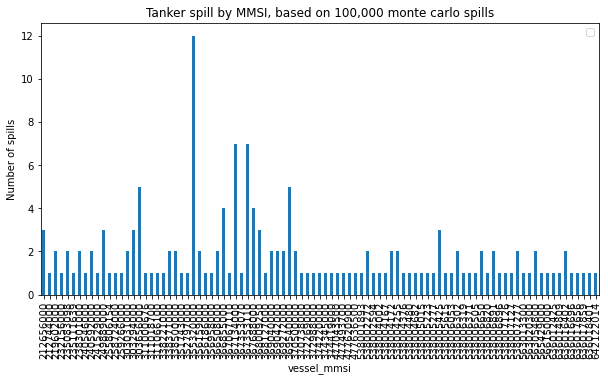

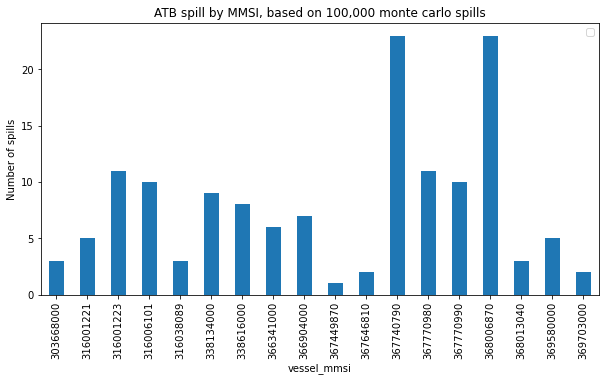

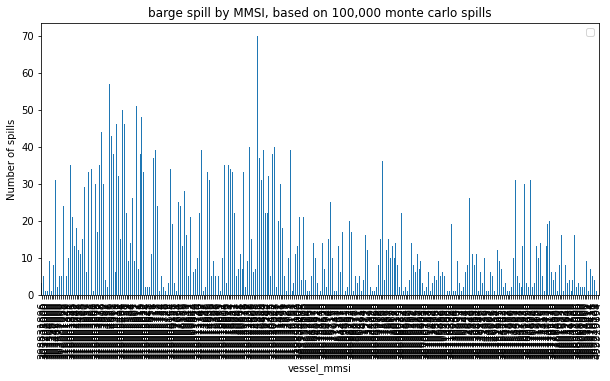

In [29]:
fig, axs = plt.subplots(1, 1,figsize=(10,5))
df.loc[
    (df.vessel_type == 'tanker'),
    ['vessel_mmsi', 'cargo_capacity']
].groupby('vessel_mmsi').count().plot(ax=axs,kind = "bar")
axs.legend('')
axs.set_ylabel('Number of spills')
axs.set_title('Tanker spill by MMSI, based on 100,000 monte carlo spills')

fig, axs = plt.subplots(1, 1,figsize=(10,5))
df.loc[
    (df.vessel_type == 'atb'),
    ['vessel_mmsi', 'cargo_capacity']
].groupby('vessel_mmsi').count().plot(ax=axs,kind = "bar")
axs.legend('')
axs.set_ylabel('Number of spills')
axs.set_title('ATB spill by MMSI, based on 100,000 monte carlo spills')

fig, axs = plt.subplots(1, 1,figsize=(10,5))
df.loc[
    (df.vessel_type == 'barge'),
    ['vessel_mmsi', 'cargo_capacity']
].groupby('vessel_mmsi').count().plot(ax=axs,kind = "bar")
axs.legend('')
axs.set_ylabel('Number of spills')
axs.set_title('barge spill by MMSI, based on 100,000 monte carlo spills')

## EXPECTED VALUE NOTES (from get_oil_capacity.ipynb)
### Tankers
Capacity, length and hfo_to_diesel comparisons from [This website](https://silo.tips/download/suezmax-oil-tanker-tankers-166300-dwt#)
which Iain Braidwood has verified as accurate. 


From `oil_attribution.ipynb`: Minimun tanker cargo capacity is 7,593,628 liters, based on small tanker size, and Maximum tanker cargo capacity is 185,447,000 liters: Corresponding to tank capacity of Suez-Max tankers as AIS data shows tanker lengths up to 287 m

### ATB cargo 
Based on information on Harley Marine Services for tank barges that received oil cargo from WA oil refineries 
in 2018, as shown in Dept. of Ecology database.  
See the OilCapacity tab in our [ATB_MMSI spreadsheet]( https://docs.google.com/spreadsheets/d/1dlT0JydkFG43LorqgtHle5IN6caRYjf_3qLrUYqANDY/edit#gid=591561201)

- **Max cargo** Capacity based on Nancy Peterkin, **Kirby 185-01** (185,000 bbls = 28,300.22 m3)
- **Min cargo** capacity based on Harley Marine tank barge **Investigator** (16,007 bbls = 2,544.95 m3)

The [Origin/Destination analysis spreadsheet](https://docs.google.com/spreadsheets/d/1yQk01wImUr_Socihx6JXUgjKvZ5-LeqbdAvqE5hp38I/edit#gid=768387675) shows vessel lengths for oil tank ATBs in AIS ranging from 23 m - 209 m. There are two clear categories: 
1. lengths < 50 m, 
2. lengths > 140 m.  

We treat the former as reflecting lengths of the tug-only and the latter as reflecting lengths of tug-barge coupling.  We reviewed the MMSI for these cases and found no instances in which an MMSI reported sometimes < 50 m and other times as > 140 m (or visa versa).  These different recordings appear to be reliable and specific to a particular MMSI.  

From `oil_attribution.ipynb`: Minimum ATB cargo volume is set to 4,000,000 liters based on the smallest load of known ATBs (Island Trader: oil_capacity.xlsx).  Maximum ATB cargo volume is set to 29,413,150 liters based on the largest load of known ATBs (Kirby 185-01: oil_capacity.xlsx).  NOTE: There are different estimates of Kirby 185-01 volumes.  This difference is because some reportings use a % of maximum ~96% as maximum volume.  Our upper bound is based on 100% capacity.


### Barge cargo
vessel length ranges from 0m to 100m.  There are 36 non-ATB tugs with a reported length of 0m. 6 out of 401 vessels report a length greater than 50m.  

From `oil_attribution.ipynb`: Minimum barge cargo volume is set to 1,500,000 liters based on value of 1,589,900 liters in  3A-10 of [DOE report](https://fortress.wa.gov/ecy/publications/documents/96250.pdf), and maximum barge cargo volume is set to 32,000,000 liters based on value of 31,797,444 of 3A-10 of [DOE report](https://fortress.wa.gov/ecy/publications/documents/96250.pdf)
